# Item Discrimination per Test



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import nbconvert
import matplotlib


pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option("display.max_columns", None)
# formatter
%reload_ext nb_black

# plt.rcParams.update({"font.size": 18})
# set figure size globally
# plt.rcParams["figure.figsize"] = (10, 13)

<IPython.core.display.Javascript object>

In [2]:
import os
from pathlib import Path

# get absolute path of this script and create Path object
path = Path(os.getcwd())

# use Path object to get path of project folder
absolutePath = path.parent.absolute()

# change working directory to project folder
os.chdir(absolutePath)

# get path of project folder
path_projectFolder = os.getcwd()

<IPython.core.display.Javascript object>

In [3]:
test1 = pd.read_csv(path_projectFolder + "/data/test_1.csv")
test2 = pd.read_csv(path_projectFolder + "/data/test_2.csv")
test3 = pd.read_csv(path_projectFolder + "/data/test_3.csv")
test4 = pd.read_csv(path_projectFolder + "/data/test_4.csv")


# Drop all empty columns from tests
# Replace 99 with nan
listTests = [test1, test2, test3, test4]

for t in listTests:
    t.dropna(how="all", axis=1, inplace=True)
    t.replace(99, np.NaN, inplace=True)
    if t["unique_id"].is_unique == False:
        ids = t["unique_id"]
        lala = t[ids.isin(ids[ids.duplicated()])]  # .sort_index("unique_id")
        # lala.sort_values(by=["Start"], ascending=True, inplace=True)

<IPython.core.display.Javascript object>

In [4]:
def item_discrimination_per_subtest(df_list):
    df_list=[]
    for t in listTests:
    
        # create copy from dataset
        df_copy = t.copy()

        # get relevant columns
        items = df_copy[
        df_copy.columns.difference(
            [
                "Unnamed: 0",
                "Test",
                "Stufe",
                "unique_id",
                "Level",
                "Gesamt_Level",
                "Start",
            ]
        )
        ].columns
        
        # show how many children did the test
        #print('count children in subtest: ',len(df_copy))
        
        # create list of items
        items = [int(x) for x in items]
        items.sort()
        items = [str(x) for x in items]
        testItemAnzahl = len(items)
        #print('count items of subtest: ',testItemAnzahl)
        #print('items: ', items)

        # groupsize
        percent = 0.25 * len(df_copy)        
        groupsize = round(percent)
        #print('groupsize: ', groupsize)
        #test1_copy.sort_values(by=["sum"], ascending=False, inplace=True)
        
        
        
        ''' define groups'''
        
        # for each child sum the results on items
        df_copy["sum"] = df_copy[items].sum(axis=1)
        df_copy.sort_values(by=["sum"], ascending=False, inplace=True)
        
        # get upper group
        upper_group = df_copy.head(groupsize)
        
        # get lower group
        lower_group = df_copy.tail(groupsize)
    
    
    
        ''' calculate item discrimination index'''
        
        dict_index = {}
        for item in items:
            upper = upper_group[item].sum()
            lower =lower_group[item].sum()
            discr_index = (upper - lower) / groupsize
            dict_index[item]= discr_index
        df = pd.DataFrame(dict_index.items(), columns=['item', 'discrimination_index'])
        df_list.append(df)
        #print(df.head())
        #print('-----------------------------------------------------------')
    return df_list


<IPython.core.display.Javascript object>

In [5]:
d_index_1 = item_discrimination_per_subtest(listTests)[0]
d_index_2 = item_discrimination_per_subtest(listTests)[1]
d_index_3 = item_discrimination_per_subtest(listTests)[2]
d_index_4 = item_discrimination_per_subtest(listTests)[3]

<IPython.core.display.Javascript object>

In [6]:
def barplot_discrimination_index(df, width, height):
    df.plot(
        figsize=(width, height),
        kind="bar",
        x="item",
        y="discrimination_index",
        width=0.8,
    )
    plt.axhline(y=0.4, color="g", linestyle="--")
    plt.axhline(y=0.25, color="black", linestyle="--")
    plt.legend(legend, bbox_to_anchor=(1, 1), borderpad=0.5, loc="lower right")
    plt.xticks(rotation="horizontal")
    plt.show()


legend = ["> 0.4 – strongly discriminating", "0.25 – starting to become discriminating"]

<IPython.core.display.Javascript object>

### Subtest 1


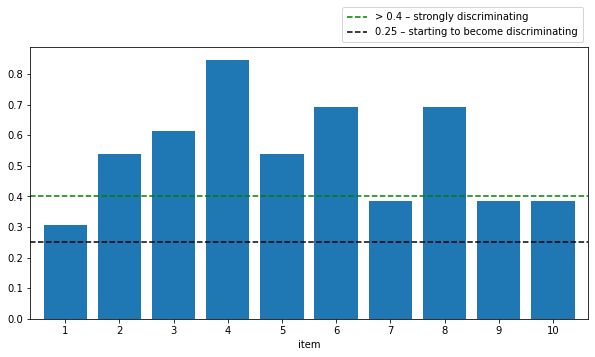

<IPython.core.display.Javascript object>

In [7]:
barplot_discrimination_index(d_index_1, 10, 5)

### Subtest 2

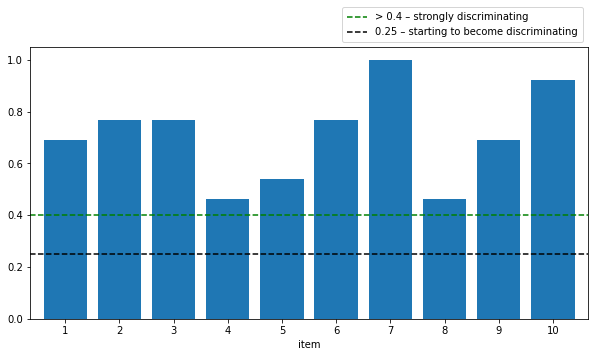

<IPython.core.display.Javascript object>

In [8]:
barplot_discrimination_index(d_index_2, 10, 5)


### Subtest 3

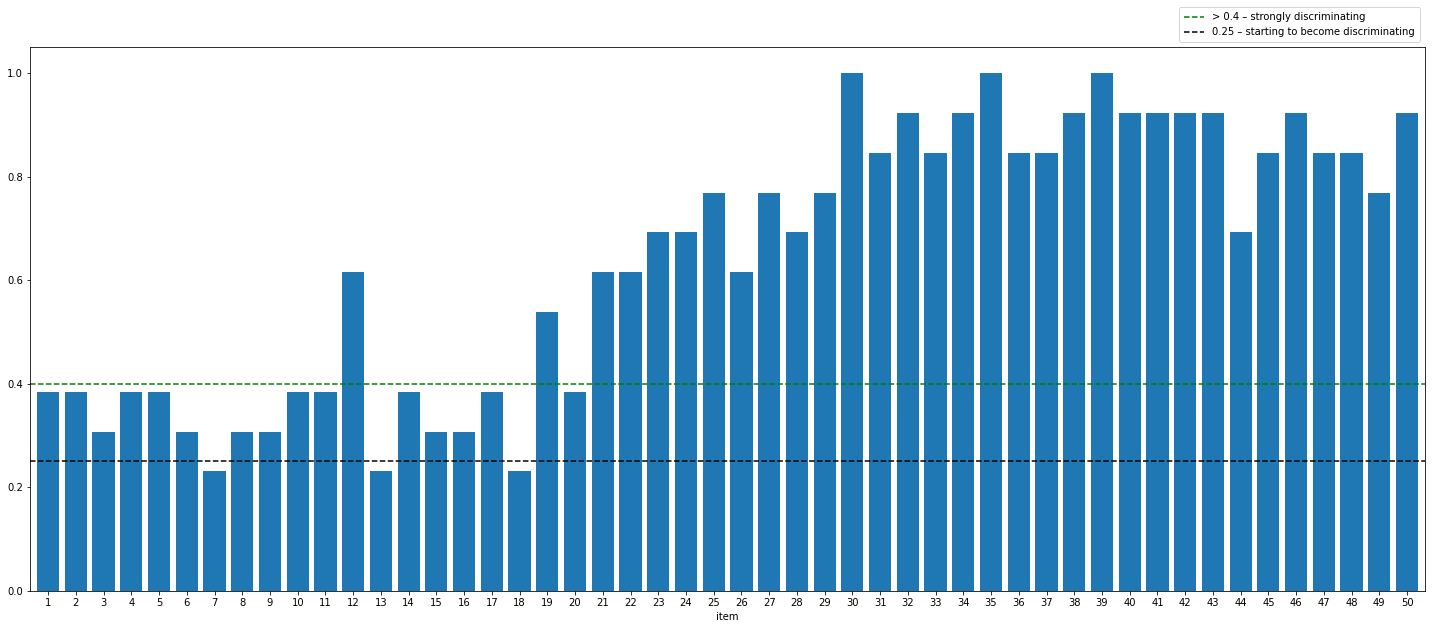

<IPython.core.display.Javascript object>

In [9]:
barplot_discrimination_index(d_index_3, 25, 10)

### Subtest 4

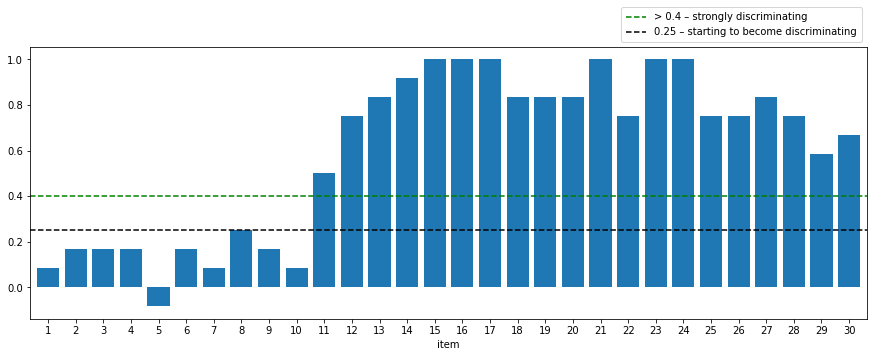

<IPython.core.display.Javascript object>

In [10]:
barplot_discrimination_index(d_index_4, 15, 5)
